# Coffee Disease Classification

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2024-06-01 13:57:37.018243: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 13:57:37.049177: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 13:57:37.049209: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 13:57:37.049233: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-01 13:57:37.055148: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 13:57:37.055479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

### Import data into tensorflow dataset object

In [11]:
IMAGE_SIZE = 128
CHANNELS = 3

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 40982 images belonging to 5 classes.


In [13]:
train_generator.class_indices

{'Cerscospora': 0, 'Healthy': 1, 'Leaf rust': 2, 'Miner': 3, 'Phoma': 4}

In [14]:
class_names = list(train_generator.class_indices.keys())
class_names

['Cerscospora', 'Healthy', 'Leaf rust', 'Miner', 'Phoma']

In [15]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.41858894 0.77647066 0.6610391 ]
  [0.41897088 0.77647066 0.66094357]
  [0.41571027 0.7746192  0.65618956]
  ...
  [0.4012036  0.70929915 0.35876513]
  [0.41808647 0.7222616  0.39525002]
  [0.42796046 0.7282152  0.42301998]]

 [[0.40069297 0.7742562  0.65610206]
  [0.4011704  0.7743518  0.6563886 ]
  [0.40170997 0.77450943 0.65284336]
  ...
  [0.40149006 0.7094901  0.359529  ]
  [0.41865936 0.72273904 0.39630035]
  [0.42776948 0.72792876 0.42321095]]

 [[0.3899437  0.77697545 0.6443409 ]
  [0.39003918 0.7767845  0.64462733]
  [0.3953365  0.779689   0.6439246 ]
  ...
  [0.40882877 0.7167334  0.3673451 ]
  [0.42802426 0.73200846 0.40614265]
  [0.43408847 0.73415226 0.42991185]]

 ...

 [[0.4155588  0.7490196  0.4078286 ]
  [0.41074586 0.7500385  0.4049683 ]
  [0.40883234 0.7549433  0.40765992]
  ...
  [0.5491425  0.8275739  0.52953464]
  [0.5493335  0.82776487 0.5297257 ]
  [0.5495244  0.82795584 0.5299166 ]]

 [[0.4153678  0.7490196  0.40964472]
  [0.40964586 0.7511385  0.40996203]


In [16]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 5853 images belonging to 5 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 11714 images belonging to 5 classes.


In [18]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.73819214 0.8676039  0.78525096]
  [0.7557928  0.8852046  0.8028516 ]
  [0.77538306 0.9047949  0.8224419 ]
  ...
  [0.06407207 0.19348383 0.0719152 ]
  [0.06390598 0.19331776 0.07174911]
  [0.06373989 0.19315165 0.07158303]]

 [[0.7376939  0.86710566 0.7847527 ]
  [0.7549624  0.88437414 0.8020212 ]
  [0.77455264 0.9039644  0.82161146]
  ...
  [0.05756292 0.18697469 0.06540605]
  [0.05723075 0.18664251 0.06507389]
  [0.05689857 0.18631035 0.06474172]]

 [[0.7371957  0.8666074  0.7842545 ]
  [0.754132   0.8835437  0.8011908 ]
  [0.7737222  0.903134   0.82078105]
  ...
  [0.04713925 0.17655101 0.05498238]
  [0.04664098 0.17605276 0.05448413]
  [0.04614273 0.1755545  0.05398586]]

 ...

 [[0.6666667  0.82745105 0.6627451 ]
  [0.6666667  0.82745105 0.6627451 ]
  [0.6666667  0.82745105 0.6627451 ]
  ...
  [0.5113792  0.6564773  0.34275174]
  [0.5252806  0.6677177  0.35133126]
  [0.4926721  0.63125396 0.30305052]]

 [[0.6596786  0.82046294 0.6537604 ]
  [0.658516   0.8193003  0.65226567]


## Building the Model

In [19]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Removed two Conv2D and MaxPooling2D layers to ensure feature map is large enough
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [4]:
40982/32

1280.6875

In [17]:
5853/32

182.90625

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=1280,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=183,
    verbose=1,
    epochs=20,
)

Epoch 1/20
1280/1280 [==============================] - 364s 284ms/step - loss: 0.2109 - accuracy: 0.9216 - val_loss: 0.0224 - val_accuracy: 0.9945
Epoch 2/20
1280/1280 [==============================] - 363s 283ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0091 - val_accuracy: 0.9983
Epoch 3/20
1280/1280 [==============================] - 369s 288ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 6.8448e-05 - val_accuracy: 1.0000
Epoch 4/20
1280/1280 [==============================] - 386s 302ms/step - loss: 0.0255 - accuracy: 0.9928 - val_loss: 0.0083 - val_accuracy: 0.9976
Epoch 5/20
1280/1280 [==============================] - 362s 283ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 3.2726e-05 - val_accuracy: 1.0000
Epoch 6/20
1280/1280 [==============================] - 362s 283ms/step - loss: 1.8855e-05 - accuracy: 1.0000 - val_loss: 1.2318e-05 - val_accuracy: 1.0000
Epoch 7/20
1280/1280 [==============================] - 359s 280ms/step - loss: 7.6552e-06 - acc

In [23]:
scores = model.evaluate(test_generator)

367/367 [==============================] - 45s 123ms/step - loss: 1.0642e-05 - accuracy: 1.0000


In [24]:
scores

[1.064194930222584e-05, 1.0]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [25]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [26]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1280}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [28]:
type(history.history['loss'])

list

In [29]:
len(history.history['loss'])

20

In [30]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.21088793873786926,
 0.027977997437119484,
 0.0061607942916452885,
 0.025464851409196854,
 0.0014319953043013811]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [32]:
val_acc

[0.9945327043533325,
 0.9982914924621582,
 1.0,
 0.9976080656051636,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [33]:
acc

[0.921636164188385,
 0.9914774298667908,
 0.9982173442840576,
 0.9928449392318726,
 0.9995848536491394,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9916727542877197,
 0.9995360374450684,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9941636323928833,
 1.0,
 1.0]

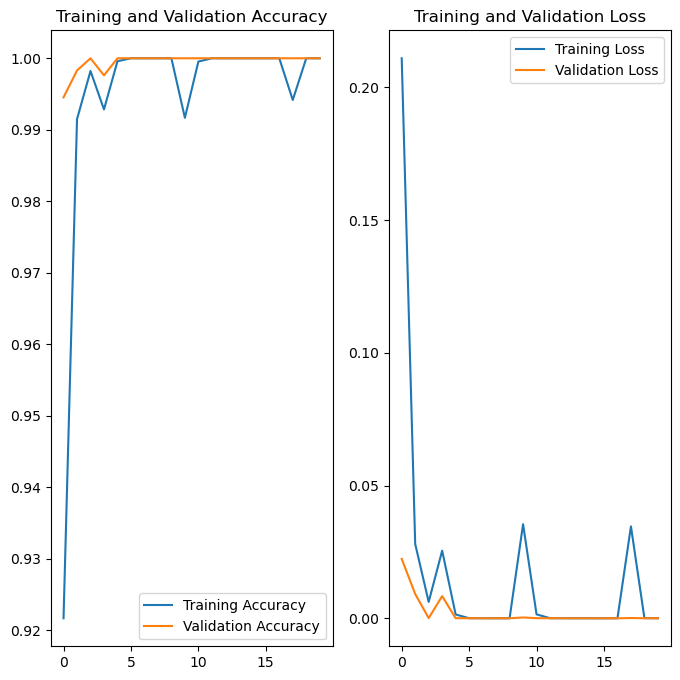

In [34]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

In [35]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

NameError: name 'labels_batch' is not defined

### Write a function for inference

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 15ms/step


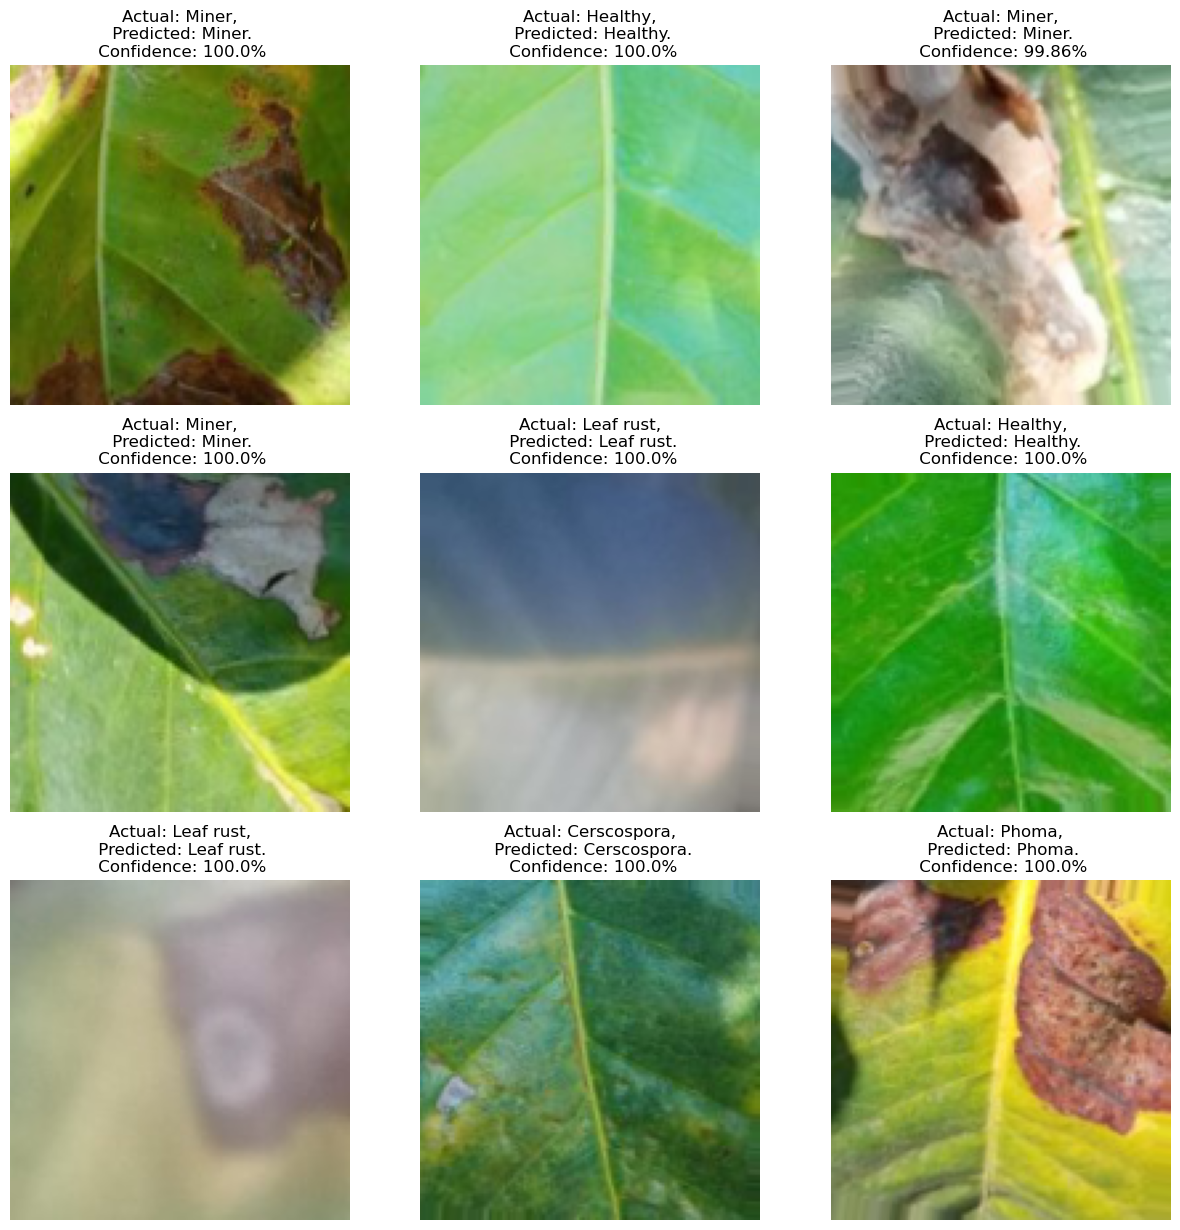

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model



In [39]:
model.save("../saved_models/coffee.keras")